In [1]:
# hello world

For clean output

In [10]:
from IPython.display import clear_output

Imports

In [11]:
import os
import random
import numpy as np
from glob import glob
from PIL import Image, ImageOps

import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, losses, optimizers, callbacks

AUTOTUNE = tf.data.AUTOTUNE


System config

In [12]:
SEED = 10
random.seed(SEED)
tf.random.set_seed(SEED)

IMAGE_SIZE = 256
MAX_TRAIN_IMAGES = 400
BATCH_SIZE = 16

TRAIN_VAL_IMAGE_DIR = "data/lol_dataset/our485/low"
TEST_IMAGE_DIR = "data/lol_dataset/eval15/low"

LEARNING_RATE = 1e-4
LOG_INTERVALS = 10
EPOCHS = 60


Set the url for the image files

In [20]:
train_val_image_files = glob(os.path.join(TRAIN_VAL_IMAGE_DIR, "*.png"))
test_image_files = glob(os.path.join(TEST_IMAGE_DIR, "*.png"))

random.shuffle(train_val_image_files)

train_image_files = train_val_image_files[:MAX_TRAIN_IMAGES]
val_image_files = train_val_image_files[MAX_TRAIN_IMAGES:]

print("Number of Training Images:", len(train_image_files))
print("Number of Validation Images:", len(val_image_files))
print("Number of Test Images from LOL Dataset:", len(test_image_files))


Number of Training Images: 400
Number of Validation Images: 85
Number of Test Images from LOL Dataset: 15


Load the data

In [21]:
def load_data(image_path):
    image = tf.io.read_file(image_path)
    image = tf.image.decode_png(image, channels=3)
    image = tf.image.resize(images=image, size=[IMAGE_SIZE, IMAGE_SIZE])
    image = image / 255.0
    return image


def get_dataset(images):
    dataset = tf.data.Dataset.from_tensor_slices((images))
    dataset = dataset.map(load_data, num_parallel_calls=AUTOTUNE)
    dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)
    dataset = dataset.prefetch(AUTOTUNE)
    
    return dataset


train_dataset = get_dataset(train_image_files)
val_dataset = get_dataset(val_image_files)

In [22]:
print("\033[94m")
print("Train Data Elements:", train_dataset.element_spec)
print("Validation Data Elements:", val_dataset.element_spec)


Train Data Elements: TensorSpec(shape=(16, 256, 256, 3), dtype=tf.float32, name=None)
Validation Data Elements: TensorSpec(shape=(16, 256, 256, 3), dtype=tf.float32, name=None)


Check few images

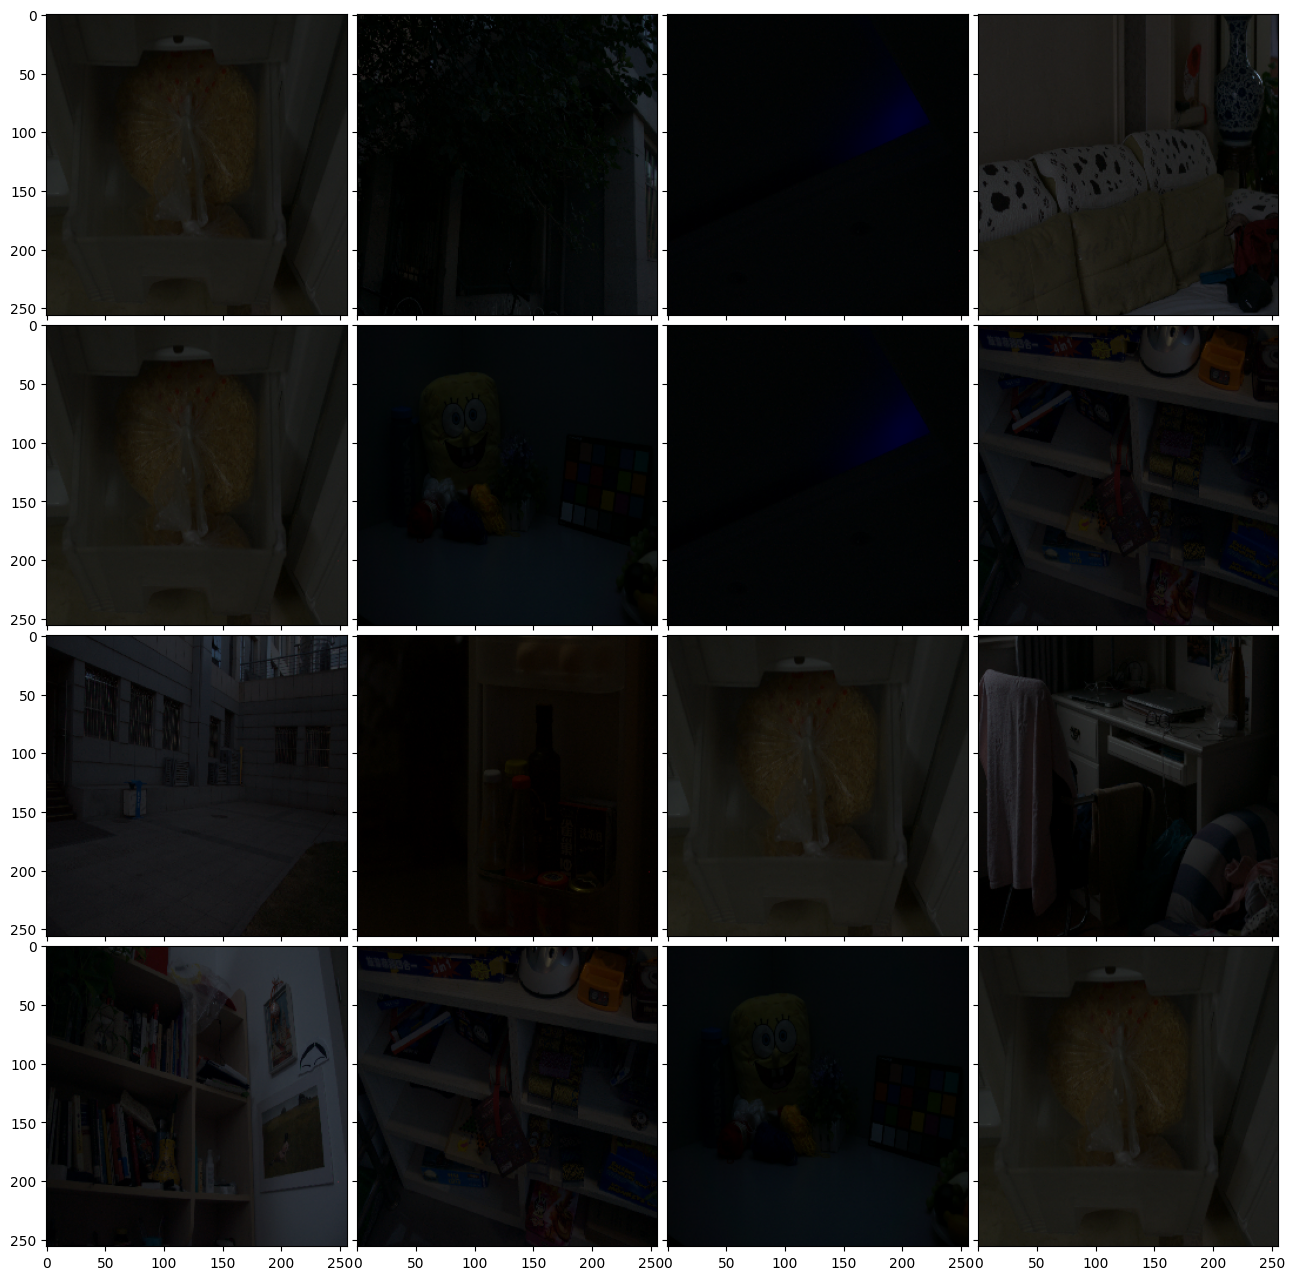

In [23]:
images = next(iter(train_dataset)).numpy()

fig = plt.figure(figsize=(16, 16))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4), axes_pad=0.1)

random_images = images[np.random.choice(np.arange(images.shape[0]), 16)]

for ax, image in zip(grid, random_images):
    image = image * 255.0
    ax.imshow(image.astype(np.uint8))

plt.title("Sample Training Images")
plt.show()

In [1]:
# hello
print(10)

10
